# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [1]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 311486 # по умолчанию вписан мой номер

2022-10-26 08:46:28.385669


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$. 
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = a(u, X^m, \boldsymbol{h}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей): 
$$a_k = a(u, X^m, \boldsymbol{k}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


# Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма. 

В качестве расстояния между объектами в этом задании используйте евклидово расстояние. 

В качестве функции ядра используйте Triangular.

Для выбора варианта, запустите код в следующей ячейке



In [2]:
if (int(str(v)[4]) % 2) == 0:
  print ('1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC')
else:
  print ('1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру')

if (int(str(v)[4]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else: 
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC
1.2 Построить график зависимости метрики качества на обучающей выборке от k


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean

np.set_printoptions(suppress=True)
%matplotlib inline

In [15]:
class SimilarityBasedClassifier:
    def __init__(self, *, k: int = 5, core: callable = lambda x: 1 - np.abs(x)):
        self.k = k
        self.core = core
        self.x = None
        self.y = None

    def __predict_for_item(self, x_test) -> (float, int):
        distances = np.array([[euclidean(x_test, x_train), index] for index, x_train in enumerate(self.x)])
        distances_sorted = distances[distances[:, 0].argsort()]
        divider = distances_sorted[self.k, 0]
        y_weights = np.zeros(np.unique(self.y).size)
        for item in distances_sorted[:self.k]:
            y_weights[self.y[int(item[1])]] += self.core(item[0] / divider)

        index_max = int(np.argmax(y_weights))
        return y_weights[1], index_max

    def fit(self, *, x_train, y_train):
        self.x = x_train
        self.y = y_train

    def predict(self, *, x: np.array) -> np.array:
        return np.array([self.__predict_for_item(item) for item in x])

In [16]:
class RocAuc:
    def __init__(self):
        self.y_true = None
        self.y_pred = None

    def __get_tpr(self, t: int) -> float:
        true_positive, false_negative = 0, 0
        for y_t, y_p in zip(self.y_true[:t], self.y_pred[:t]):
            if y_t == 0:
                continue

            if y_t == y_p:
                true_positive += 1
                continue

            false_negative += 1

        try:
            return true_positive / (true_positive + false_negative)
        except ZeroDivisionError:
            return 0

    def __get_fpr(self, t: int) -> float:
        false_positive, true_negative = 0, 0
        for y_t, y_p in zip(self.y_true[:t], self.y_pred[:t]):
            if y_t == 1:
                continue

            if y_t == y_p:
                true_negative += 1
                continue

            false_positive += 1

        try:
            return false_positive / (false_positive + true_negative)
        except ZeroDivisionError:
            return 0

    def __prepare_data(self):
        p = np.argsort(-self.y_pred[:, 0])
        self.y_true = self.y_true[p]
        self.y_pred = self.y_pred[:, 1][p].astype(int)

    def fit(self, *, y_true: np.array, y_pred: np.array):
        self.y_true = y_true
        self.y_pred = y_pred
        self.__prepare_data()

    def get_plot_data(self, *, t: int) -> (np.array, np.array):
        tpr = np.array([])
        fpr = np.array([])
        for i in range(0, self.y_pred.size, t):
            tpr = np.append(tpr, self.__get_tpr(i))
            fpr = np.append(fpr, self.__get_fpr(i))

        return tpr, fpr

    @staticmethod
    def get_auc(fpr: np.array, tpr: np.array) -> float:
        auc = 0
        for i in range(fpr.size - 1):
            cur_fpr, cur_tpr = fpr[i], tpr[i]
            next_fpr, next_tpr = fpr[i + 1], tpr[i + 1]
            rectangle = min(cur_tpr, next_tpr) * abs(next_fpr - cur_fpr)
            triangle = abs((cur_tpr - next_tpr) * (next_fpr - cur_fpr)) / 2
            auc += (rectangle + triangle) / 2

        return auc

Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

#### Тест для k = 11 

(y_pred.size = 143 = 11 * 13)

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

My model prediction:
[1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1]

Test values:
[1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0]

ROC AUC Score = 0.897


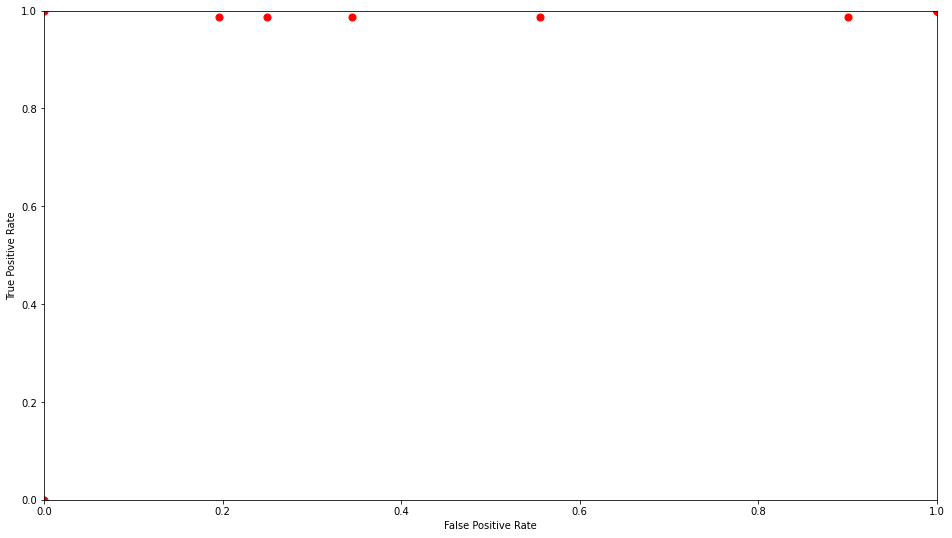

In [21]:
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

model = SimilarityBasedClassifier(k=10, core=lambda x: 1 - np.abs(x))
model.fit(x_train=x_train, y_train=y_train)
y_pred = model.predict(x=x_test)

print(f"My model prediction:\n{y_pred[:, 1].astype(int)}\n")
print(f"Test values:\n{y_test}\n")

roc_auc = RocAuc()
roc_auc.fit(y_true=y_test, y_pred=y_pred)
tpr, fpr = roc_auc.get_plot_data(t=11)

auc = roc_auc.get_auc(fpr, tpr)
print(f"ROC AUC Score = {auc:.3f}")

plt.figure(figsize=(16, 9))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.scatter(fpr, tpr, label="ROC_AUC", color="red", marker="o", s=50)
plt.show()

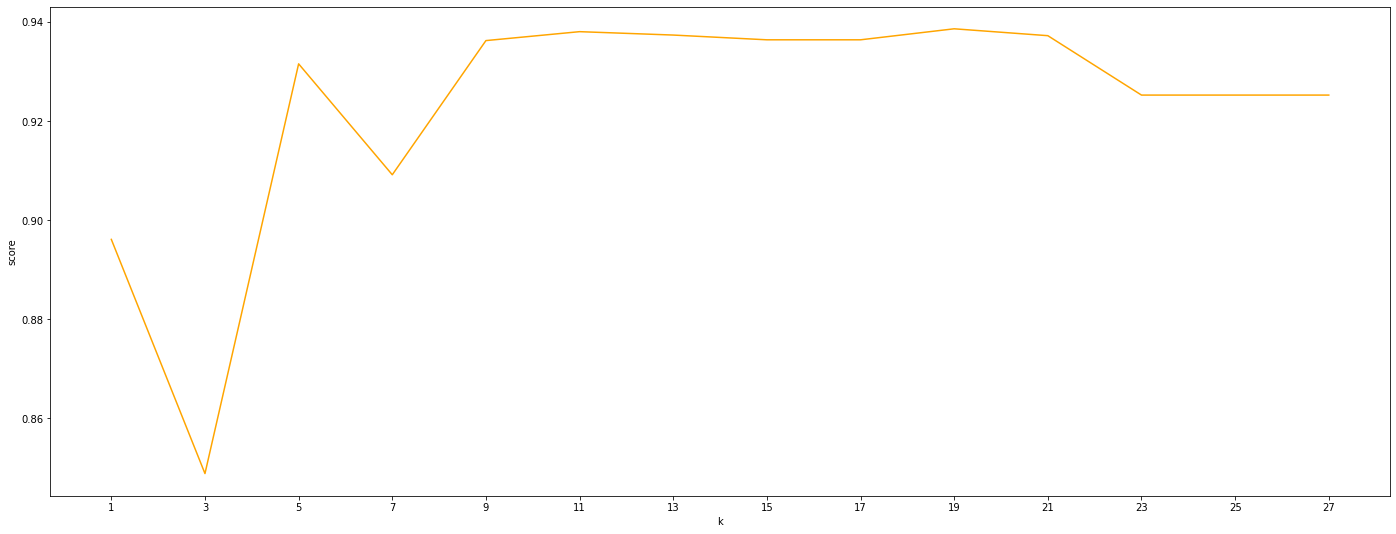

In [20]:
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)
auc_score = np.array([])
arr_k = np.array([2 * i - 1 for i in range(1, 15)])
for k in arr_k:
    model = SimilarityBasedClassifier(k=k)
    model.fit(x_train=x_train, y_train=y_train)
    y_pred = model.predict(x=x_test)

    score_model = RocAuc()
    score_model.fit(y_true=y_test, y_pred=y_pred)
    tpr, fpr = score_model.get_plot_data(t=11)
    score = score_model.get_auc(fpr, tpr)
    auc_score = np.append(auc_score, score_model.get_auc(fpr, tpr))

plt.figure(figsize=(24, 9))
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(arr_k)
plt.plot(arr_k, auc_score, label="Auc Roc Score", color="orange")
plt.show()

Может потребоваться предобработка данных

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации). 

В задании 2 не используйте ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [27]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

По этому словарю нужно сделать Dataframe в pandas. Строки это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

Для выбора варианта, запустите код в следующей ячейке

In [26]:
if (int(str(v)[3]) % 2) == 0:
  print ('2.1 Сделайте предсказание оценок для критика Toby по фильмам, которые он ещё не видел')
else:
  print ('2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели')
print ('2.2 Объясните как оценить качество полученного предказания')

2.1 Сделайте предсказание оценок для критика Toby по фильмам, которые он ещё не видел
2.2 Объясните как оценить качество полученного предказания


Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

In [22]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import euclidean

In [23]:
df = pd.DataFrame(critics).T.fillna(0)
df

,Lady in the Water,Snakes on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.5,3.5,3.0,3.5,2.5,3.0
Gene Seymour,3.0,3.5,1.5,5.0,3.5,3.0
Michael Phillips,2.5,3.0,0.0,3.5,0.0,4.0
Claudia Puig,0.0,3.5,3.0,4.0,2.5,4.5
Mick LaSalle,3.0,4.0,2.0,3.0,2.0,3.0
Jack Matthews,3.0,4.0,0.0,5.0,3.5,3.0
Toby,0.0,4.5,0.0,4.0,1.0,0.0


In [24]:
class RegressionAnalysisSimilarity:
    def __init__(self):
        self.data = None
        self.x = None
        self.y = None

    def __prepare_data(self, critic_name: str) -> None:
        self.x = self.data.columns.copy().to_numpy()
        data_without_critic = self.data.copy().drop(critic_name)
        names = data_without_critic.index.to_numpy()
        marks = data_without_critic.to_numpy()
        self.y = np.array([[name, mark] for name, mark in zip(names, marks)], dtype=object)

    def fit(self, *, data: pd.DataFrame) -> None:
        self.data = data.copy(deep=True)

    def fill_zero_for_critic(self, *, critic_name: str) -> pd.DataFrame:
        critic_marks = self.data.loc[critic_name].to_numpy()
        self.__prepare_data(critic_name)
        critic_valid_marks = np.nonzero(critic_marks)[0]

        distances = []
        for other_cr in self.y:
            other_critic_valid_marks = np.nonzero(other_cr[1])
            both_non_zero_items = np.intersect1d(critic_valid_marks, other_critic_valid_marks)
            if both_non_zero_items.size == 0:
                continue

            new_distances = np.array([other_cr[0], euclidean(critic_marks[both_non_zero_items],
                                                             other_cr[1][both_non_zero_items])])
            distances.append(new_distances)

        distances = np.array(distances, dtype=object)
        max_distance = np.max(distances[:, 1].astype(float))
        weights = np.abs(1 - distances[:, 1].astype(float) / max_distance) 
        for index, mark in enumerate(critic_marks):
            if mark != 0:
                continue

            current_film_marks = self.data.loc[distances[:, 0], self.x[index]].to_numpy().astype(float)
            non_zero_marks = np.nonzero(current_film_marks)
            current_mark = sum(current_film_marks[non_zero_marks] * weights[non_zero_marks]) 

            self.data.loc[critic_name, self.x[index]] = current_mark / sum(weights[non_zero_marks])

        return self.data

In [25]:
df = pd.DataFrame(critics).T.fillna(0)
model = RegressionAnalysisSimilarity()
model.fit(data=df)
new_df = model.fill_zero_for_critic(critic_name='Toby')
new_df

,Lady in the Water,Snakes on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.500000,3.5,3.000000,3.5,2.5,3.000000
Gene Seymour,3.000000,3.5,1.500000,5.0,3.5,3.000000
Michael Phillips,2.500000,3.0,0.000000,3.5,0.0,4.000000
Claudia Puig,0.000000,3.5,3.000000,4.0,2.5,4.500000
Mick LaSalle,3.000000,4.0,2.000000,3.0,2.0,3.000000
Jack Matthews,3.000000,4.0,0.000000,5.0,3.5,3.000000
Toby,2.698227,4.5,2.601456,4.0,1.0,3.594776


#### Ответы на вопросы

Посмотреть на качество нашей модели можно при помощи при помощи методов оценки качества классификации, к примеру ROC или PR кривых.

В данном случае, невооружённым глазом видно, что точность нашей модели будет низкой, так как:


1.   Малое количество исходных данных для анализа (результаты 6 критиков)
2.   Схожесть мнений критиков формируется по их оценкам для фильмов без учёта их характеристик: жанр, длительность...

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [28]:
current_datetime = datetime.now()
print(current_datetime)

2022-10-26 10:09:35.412516
